# Plotly #

Installation instructions and first steps can be found here: https://plot.ly/python/getting-started/

Since I am using the anaconda distribution I installed Python with conda (and not pip). <br> On Windows open an "Anaconda Prompt" (shell) and type  

`conda install -c conda-forge plotly`

Check it:

In [1]:
import plotly
plotly.__version__

'3.10.0'

## 1) OFFLINE Plotting Embedded in Jupyter Notebook or Jupyter Lab##

https://plot.ly/python/offline/

**NOTE for jupyterlab users:**<br>
This only concerns jupyterlab, not jupyter notebook!<br>
IN order to use plotly inline plotting with jupyterlab some installations and configurations are required: <br>
https://github.com/jupyterlab/jupyter-renderers/tree/master/packages/plotly-extension

Open an **Anaconda Prompt** window and call `jupyter labextension install @jupyterlab/plotly-extension`


### 2D Scatter Plot with Points and Lines ###

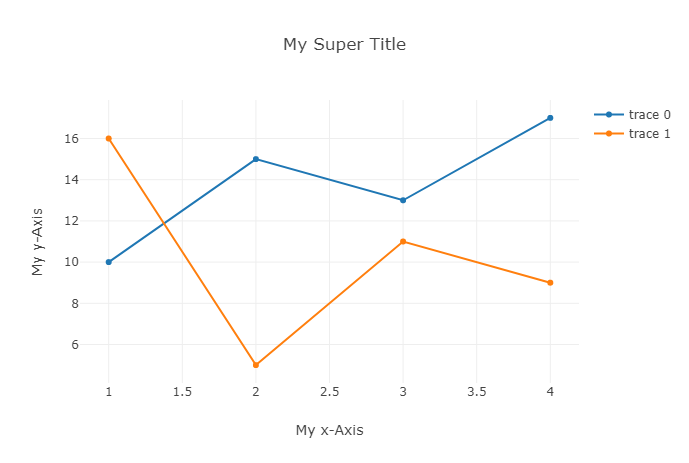

In [4]:
import plotly as py
import plotly.graph_objs as go

#py.offline.init_notebook_mode(connected = False)
py.offline.init_notebook_mode(connected = True)

layout = go.Layout(
    title = "My Super Title",
    xaxis = dict(
        title = "My x-Axis"
    ),
    yaxis = dict(
        title = "My y-Axis"
    )
)

trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = [trace0, trace1]

fig = go.Figure(data = data, layout = layout)

py.offline.iplot(fig)
#py.plot(data, filename = 'basic-line', auto_open=True)

### 3D Scatter Plot ###

In [ ]:
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected = True)

import numpy as np

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3)*.3, 50).transpose()
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=6,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

x2, y2, z2 = np.random.multivariate_normal(np.array([2,2,2]), np.eye(3)*.3, 50).transpose()
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=6,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='simple-3d-scatter')
py.offline.iplot(fig)

In [ ]:
fig

## 2) ONLINE Plotting on Plotly Chart Studio Dashboard (non-streaming) ##

Unless you do not have an account yet you have to **sign up** with **Plotly Chart Studio** first: https://plot.ly/Auth/login/?action=signup#/

When you are registered and signed in you will find your credentials (Username and API Key) under API Settings: https://plot.ly/settings/api

This information has to be copied to your personal local credential file on your computer. This is done from Python by calling 

`plotly.tools.set_credentials_file(username=myUsername, api_key=myAPIKey)`

Replace `myUsername` and `myAPIKey` with your credentials from your online Plotly API Settings: https://plot.ly/settings/api 

In [ ]:
plotly.tools.set_credentials_file(username=myUsername, api_key=myAPIKey)

Calling `set_credential_file(...)` creates or modifies your personal Plotly credential file.  

You just have to **call this command once** for a given API key!

**Remove** the command from your Python script so nobody can read your API key. The **API key** is your **secret**.

Only if you change your API key on the plotly dashboard (website) then you have to update your API key locally by calling  `set_credential_file(...)` 

On Windows machines you find it in a hidden directory (folder) in your home directory. On my computer the full filename including path is `C:\Users\rb\.plotly\.credentials`. This text file is in json format and can be viewed in a text editor usch as notepad++. It contains a dictionary with parameters. 

It can also be read and printed from Python with `plotly.tools.get_credentials_file()`.

For my settings the output yieds:

```
{'username': 'Dr_B',
 'api_key': 'XXXXXXXXXXXXXXXXXXX',
 'proxy_username': '',
 'proxy_password': '',
 'stream_ids': []}
```
        



In [ ]:
plotly.tools.get_credentials_file()

From now on this information (username, api_key) stored locally on your computer is used in the background to authenticate you against plotly. When you run your script on another computer you have to transfer username and API key to the new local plotly credential file. 

### The first online plot! ###

Calling the next script will create a diagram on your Plotly Chart Studio Dashboard. Because of the option `auto_open=True` a new brower tab is showing the plot is opend automatically. 

#### Minimal ####

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x=[1, 2, 3, 4, 5],
    y=[10, 15, 13, 17, 20]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4, 5],
    y=[16, 5, 11, 9, 7]
)
data = [trace0, trace1]

#py.plot(data, filename = 'basic-line', auto_open=False)
py.plot(data, filename = 'basic-line', auto_open=True)

#### With explicit layout ####

In [ ]:
import plotly as py
import plotly.graph_objs as go

layout = go.Layout(
    title = "My Title",
    xaxis = dict(
        title = "My x-Axis"
    ),
    yaxis = dict(
        title = "My y-Axis"
    )
)

trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = [trace0, trace1]

fig = go.Figure(data = data, layout = layout)

thePlotURL = py.plotly.plot(fig,auto_open=True)

print("The plot is created under the URL ", thePlotURL)

By default **all plots are public!** In my case everybody can see them under the URL `thePlotURL` without logging in.

## 3) ONLINE Streaming with plotly ##

**-> BUMMER: Plotly Chart Studio (free edition) does not support streaming anymore!!!**

The plots so far are based on static data. This becomes obvious when you open the collection "My Files" in your Plotly Chart Studio profile. You will see that each plot is connected to a spreadsheet which I would call static data.

For realtime plotting fast continuous data streaming is required. This is achieved by **stream sockets**. <br>
Further explanation can be found here:
* https://plot.ly/python/streaming-tutorial/
* https://github.com/plotly/Streaming-Demos
* https://docs.python.org/3/howto/sockets.html




## A new idea: extend plot with fresh data ##

In [10]:
#Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly.plotly as py
from plotly.graph_objs import *

trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
data = [trace0]

plot_url = py.plot(data, filename='extend plot', fileopt='extend', auto_open=True)

In [12]:
trace0 = go.Scatter(
    x=[30],
    y=[30]
)
data = [trace0]

plot_url = py.plot(data, filename='extend plot', fileopt='extend', auto_open=False)